# CUP

### Lettura, understanding e preparazione dei dati

In [43]:
from utils import *

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import make_scorer
# per visualizzare i dati in 3D
from mpl_toolkits.mplot3d import Axes3D
# per rimuovere i warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [44]:
header_tr = ['id', 'input_1', 'input_2', 'input_3', 'input_4', 'input_5', 'input_6', 'input_7', 'input_8', 'input_9', 'input_10', 'input_11', 'input_12', 'output_x', 'output_y', 'output_z']
header_ts = ['id', 'input_1', 'input_2', 'input_3', 'input_4', 'input_5', 'input_6', 'input_7', 'input_8', 'input_9', 'input_10', 'input_11', 'input_12']

In [45]:
# path per fisso (TR)
training_set_path = r'C:\Users\Giovanni\Desktop\Machine Learning (ML)\new\16-ML-24-PRJ lecture amp package-20250204\ML-Working\ML_course_stuffs\ML-CUP24-TR.csv'
# path per portatile (TR)
# training_set_path = r'C:\Users\hp\Desktop\Machine Learning (ML)\ML-Working\data\ML-CUP24-TR.csv'
df_TR = pd.read_csv(training_set_path, comment='#', names=header_tr)

# path per fisso (TS)
test_set_path = r'C:\Users\Giovanni\Desktop\Machine Learning (ML)\new\16-ML-24-PRJ lecture amp package-20250204\ML-Working\ML_course_stuffs\ML-CUP24-TS.csv'
# path per portatile (TS)
# test_set_path = r'C:\Users\hp\Desktop\Machine Learning (ML)\ML-Working\data\ML-CUP24-TS.csv'
df_TS = pd.read_csv(test_set_path, comment='#', names=header_ts)

In [46]:
print(df_TR.shape)
print(df_TS.shape)

(250, 16)
(500, 13)


In [47]:
df_TR

,id,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,input_10,input_11,input_12,output_x,output_y,output_z
0,1,0.946373,0.307995,0.820058,-0.309386,0.950936,-0.000913,-0.093048,-0.029318,0.995230,-1.175176,2.295016,0.223732,-0.011599,-0.503652,-5.564158
1,2,-0.074075,-0.992654,-1.162582,0.997240,-0.074209,-0.002159,-0.004956,-0.095561,0.995411,0.675930,3.147029,-0.297508,-0.361982,-0.186246,3.445744
2,3,0.841384,0.531605,0.810176,-0.534053,0.845451,-0.001057,-0.082832,-0.051079,0.995254,-1.069958,2.415989,0.234664,0.170027,-0.344143,-3.675575
3,4,0.737117,-0.668400,-1.065601,0.671734,0.740793,0.000008,0.073704,-0.066844,0.995038,11.038418,1.003455,-0.100332,-1.032355,-1.184874,15.554511
4,5,-0.987858,-0.119426,-1.072857,0.120013,-0.992772,0.000064,-0.098661,-0.011863,0.995050,14.834930,1.127759,-0.112600,-0.134817,2.047468,20.522760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,-0.137718,-0.985461,-1.065403,0.990376,-0.138405,-0.000001,-0.013770,-0.098546,0.995037,10.071104,1.000095,-0.100000,-1.353264,0.238883,15.302641
246,247,-0.028379,0.994637,-1.068339,-0.999593,-0.028524,-0.000034,-0.002871,0.099412,0.995042,7.160917,1.049944,-0.104927,1.133835,-0.021876,12.519422
247,248,-0.338123,0.935834,-1.069124,-0.940496,-0.339804,0.000040,-0.033753,0.093536,0.995044,13.611015,1.063376,-0.106253,1.796126,0.651817,19.607162
248,249,0.530569,-0.842100,-1.145958,0.845997,0.533185,-0.001397,0.052773,-0.081126,0.995306,0.895313,2.670018,-0.257156,-0.171992,-0.182172,3.971099


In [48]:
df_TS

,id,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,input_10,input_11,input_12
0,1,0.964008,0.249750,0.621279,-0.251304,0.967891,0.005800,-0.086798,-0.028503,0.995818,20.769237,4.786694,0.414053
1,2,-0.976968,-0.189726,-1.128659,0.190555,-0.981676,0.000850,-0.096032,-0.017779,0.995219,19.189428,2.239992,-0.218716
2,3,0.130254,0.986475,0.924671,-0.991395,0.130904,0.000001,-0.013024,-0.098648,0.995037,-10.339886,1.000085,0.099999
3,4,-0.153785,0.983480,0.744844,-0.988026,-0.154274,-0.002289,0.012480,-0.094696,0.995428,-0.650716,3.219906,0.303438
4,5,-0.655386,-0.749436,-1.182304,0.752975,-0.658039,-0.003522,-0.059142,-0.073003,0.995577,0.490563,3.837265,-0.350978
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,-0.985749,0.135962,0.893743,-0.136651,-0.990619,-0.000175,0.098105,-0.013709,0.995082,-3.261989,1.388533,0.138133
496,497,-0.994779,0.023186,-1.072384,-0.023307,-0.999728,0.000061,-0.099352,0.002377,0.995049,14.707749,1.119545,-0.111791
497,498,0.710812,0.697125,0.687399,-0.700446,0.713695,0.003745,-0.064198,-0.068231,0.995602,20.889475,3.938834,0.358318
498,499,-0.990037,0.100074,0.893355,-0.100586,-0.994928,-0.000177,0.098531,-0.010139,0.995082,-3.236003,1.393368,0.138603


In [49]:
# preparazione dati
X = df_TR.iloc[:, 1:-3]
y = df_TR.iloc[:, -3:]

X_blind_test = df_TS.iloc[:, 1:]
# y_blind_test AKA blind test questo ce l'ha il prof

In [50]:
print(X.shape)
print(y.shape)

(250, 12)
(250, 3)


In [51]:
y.describe()

,output_x,output_y,output_z
count,250.000000,250.000000,250.000000
mean,-0.044443,-0.126759,8.025199
std,1.009217,0.846956,10.080283
min,-2.248349,-2.520064,-9.749162
25%,-0.616836,-0.556812,-0.476446
50%,-0.033533,-0.057475,8.401443
75%,0.560011,0.345756,16.675195
max,2.414896,2.047468,25.803534


- la *x* delle label ha un range tra -2.2 e 2.4
- la *y* delle label ha un range tra -2.5 e 2
- la *z* delle label ha un range tra -9.7 e 25.8

In [52]:
y

,output_x,output_y,output_z
0,-0.011599,-0.503652,-5.564158
1,-0.361982,-0.186246,3.445744
2,0.170027,-0.344143,-3.675575
3,-1.032355,-1.184874,15.554511
4,-0.134817,2.047468,20.522760
...,...,...,...
245,-1.353264,0.238883,15.302641
246,1.133835,-0.021876,12.519422
247,1.796126,0.651817,19.607162
248,-0.171992,-0.182172,3.971099


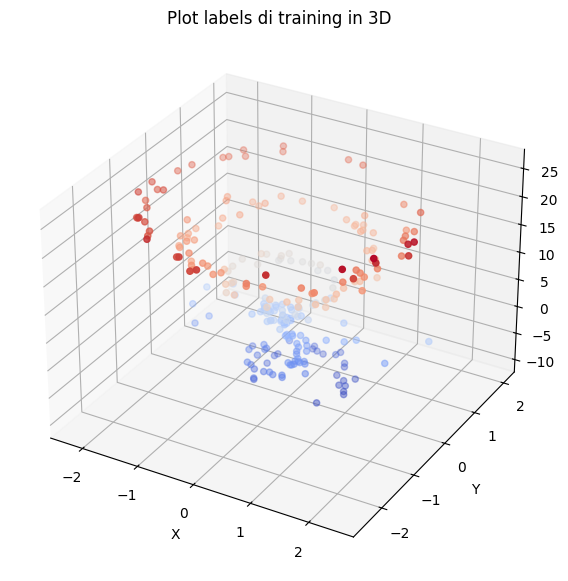

In [53]:
# Plot lables del file di training della CUP in 3D

y_array = y.to_numpy() 

X_coor = y_array[:, 0]  
Y_coor = y_array[:, 1]  
Z_coor = y_array[:, 2] 

# Creazione figura 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D
ax.scatter(X_coor, Y_coor, Z_coor, c=Z_coor, cmap='coolwarm', marker='o')

# Label assi
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Plot labels di training in 3D")

plt.show()

In [54]:
X_blind_test.shape

(500, 12)

In [55]:
X_blind_test

,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,input_10,input_11,input_12
0,0.964008,0.249750,0.621279,-0.251304,0.967891,0.005800,-0.086798,-0.028503,0.995818,20.769237,4.786694,0.414053
1,-0.976968,-0.189726,-1.128659,0.190555,-0.981676,0.000850,-0.096032,-0.017779,0.995219,19.189428,2.239992,-0.218716
2,0.130254,0.986475,0.924671,-0.991395,0.130904,0.000001,-0.013024,-0.098648,0.995037,-10.339886,1.000085,0.099999
3,-0.153785,0.983480,0.744844,-0.988026,-0.154274,-0.002289,0.012480,-0.094696,0.995428,-0.650716,3.219906,0.303438
4,-0.655386,-0.749436,-1.182304,0.752975,-0.658039,-0.003522,-0.059142,-0.073003,0.995577,0.490563,3.837265,-0.350978
...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.985749,0.135962,0.893743,-0.136651,-0.990619,-0.000175,0.098105,-0.013709,0.995082,-3.261989,1.388533,0.138133
496,-0.994779,0.023186,-1.072384,-0.023307,-0.999728,0.000061,-0.099352,0.002377,0.995049,14.707749,1.119545,-0.111791
497,0.710812,0.697125,0.687399,-0.700446,0.713695,0.003745,-0.064198,-0.068231,0.995602,20.889475,3.938834,0.358318
498,-0.990037,0.100074,0.893355,-0.100586,-0.994928,-0.000177,0.098531,-0.010139,0.995082,-3.236003,1.393368,0.138603


In [56]:
# Split dei dati (dev e internal test set)
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training + Validation Set (Dev Set): {len(X_dev)} campioni")
print(f"Internal Test Set: {len(X_test)} campioni")

Training + Validation Set (Dev Set): 200 campioni
Internal Test Set: 50 campioni


In [57]:
print(X_dev.shape)
print(y_dev.shape)   
print(X_test.shape)
print(y_test.shape) 

(200, 12)
(200, 3)
(50, 12)
(50, 3)


In [58]:
y_dev.describe()

,output_x,output_y,output_z
count,200.000000,200.000000,200.000000
mean,-0.076565,-0.112606,8.326707
std,1.032557,0.856590,10.110998
min,-2.248349,-2.520064,-9.749162
25%,-0.682402,-0.599585,-0.298402
50%,-0.007573,-0.058434,8.804563
75%,0.555994,0.322824,16.829502
max,2.414896,2.047468,25.803534


In [59]:
# Split dei dati (train e val set)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.2, random_state=42)

print(f"Training Set: {len(X_train)} campioni")
print(f"Validation Set: {len(X_val)} campioni")

Training Set: 160 campioni
Validation Set: 40 campioni


In [60]:
print(X_train.shape)
print(y_train.shape)    
print(X_val.shape)
print(y_val.shape)

(160, 12)
(160, 3)
(40, 12)
(40, 3)


### Allenamento con grid e internal test

In [61]:
epochs = 500

In [62]:
# No scaling

# NN per task di regressione
mlp = MLPRegressor(max_iter=epochs, random_state=42)

# Creazione dello scorer personalizzato per MEE
mee_scorer = make_scorer(mean_euclidean_error, greater_is_better=False)

param_grid = [
    {
        'hidden_layer_sizes': [(3,), (50,), (5, 3), (50, 50), (100, 80), (10, 8, 5), (50, 50, 50), (200, 200, 200)],
        'activation': ['tanh', 'relu'],  
        'solver': ['sgd'], 
        'alpha': [0.0001, 0.001, 0.01, 0.1], 
        'learning_rate_init': [0.01, 0.02, 0.001, 0.002, 0.0001],
        'learning_rate': ['constant', 'adaptive'],  
        'batch_size': [16, 32, 64], # 1 -> online, 'auto' --> fullbatch, other --> minibatch
        'momentum': [0.9, 0.95]
    },
]

# Creazione del K-Fold Cross Validation (5 fold)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Creazione di GridSearchCV usando MSE come scoring per il training
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, refit=True)

# Esecuzione Grid Search usando Training Set e Validation Set (AKA dev set)
grid_search.fit(X_dev, y_dev)

# Miglior modello trovato dalla Grid Search
best_mlp = grid_search.best_estimator_

# Calcolo del MEE medio con cross-validation sul miglior modello
mee_scores = cross_val_score(best_mlp, X_dev, y_dev, cv=cv, scoring=mee_scorer, n_jobs=-1)

# Migliori parametri trovati
print("Migliori parametri trovati:", grid_search.best_params_)
print("MSE medio (sui 5 fold) sul Validation:", -grid_search.best_score_)
print("MEE medio (sui 5 fold) sul Validation:", -np.mean(mee_scores))

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


c:\Users\Giovanni\anaconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2460 fits failed out of a total of 19200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2460 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Giovanni\anaconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Giovanni\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Giovanni\anaconda3\envs\ml\Lib\site-packages\sklearn\neural_ne

Migliori parametri trovati: {'activation': 'relu', 'alpha': 0.1, 'batch_size': 32, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.002, 'momentum': 0.95, 'solver': 'sgd'}
MSE medio (sui 5 fold) sul Validation: 0.3189351720175755
MEE medio (sui 5 fold) sul Validation: 0.795482811680342


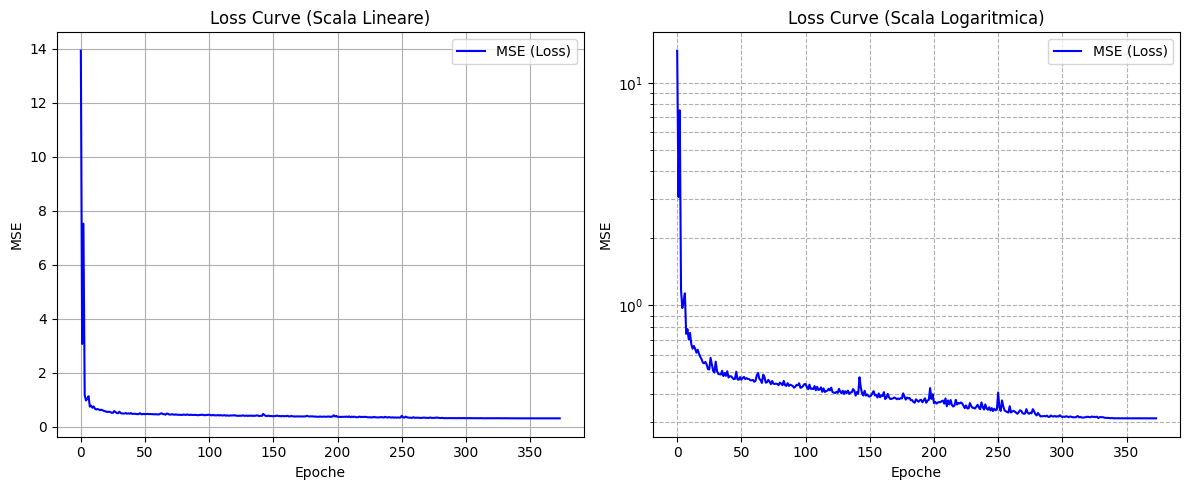

In [22]:
plt.figure(figsize=(12, 5))

# Grafico con scala lineare
plt.subplot(1, 2, 1)  # (1 riga, 2 colonne, primo grafico)
plt.plot(best_mlp.loss_curve_, label="MSE (Loss)", color="blue")
plt.xlabel("Epoche")
plt.ylabel("MSE")
plt.title("Loss Curve (Scala Lineare)")
plt.legend()
plt.grid(True)

# Grafico con scala logaritmica
plt.subplot(1, 2, 2)  # (1 riga, 2 colonne, secondo grafico)
plt.plot(best_mlp.loss_curve_, label="MSE (Loss)", color="blue")
plt.xlabel("Epoche")
plt.ylabel("MSE")
plt.title("Loss Curve (Scala Logaritmica)")
plt.yscale("log")  # Imposta scala logaritmica
plt.legend()
plt.grid(True, which="both", linestyle="--")  # Grid anche sui minori

plt.tight_layout()  # Migliora la disposizione
plt.show()

In [24]:
# Miglior iperparametri
params = grid_search.best_params_
params

{'activation': 'relu',
 'alpha': 0.1,
 'batch_size': 32,
 'hidden_layer_sizes': (50, 50),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.002,
 'momentum': 0.95,
 'solver': 'sgd'}

In [25]:
# Creazione del dataframe contenente tutti i risultati della Grid Search
cv_res_df = pd.DataFrame(grid_search.cv_results_)

In [26]:
cv_res_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_batch_size,param_hidden_layer_sizes,param_learning_rate,param_learning_rate_init,...,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034000,0.004858,0.001800,0.000400,tanh,0.0001,16,"(3,)",constant,0.0100,...,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'batch...",-3.959135,-4.810385,-4.123873,-5.708855,-2.894326,-4.299315,0.934718,2568
1,0.043006,0.024325,0.002000,0.000633,tanh,0.0001,16,"(3,)",constant,0.0100,...,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'batch...",-4.823181,-5.132777,-3.428963,-6.146286,-6.246866,-5.155615,1.026121,2671
2,0.052623,0.031740,0.001400,0.000490,tanh,0.0001,16,"(3,)",constant,0.0200,...,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'batch...",-5.466167,-8.182153,-5.220689,-4.810753,-2.794987,-5.294950,1.723661,2688
3,0.030230,0.007139,0.001400,0.000490,tanh,0.0001,16,"(3,)",constant,0.0200,...,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'batch...",-6.342468,-4.740199,-5.397941,-4.590283,-4.768452,-5.167869,0.649408,2675
4,0.138041,0.012225,0.001400,0.000490,tanh,0.0001,16,"(3,)",constant,0.0010,...,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'batch...",-1.232716,-1.003231,-0.948475,-1.150800,-0.699262,-1.006897,0.184265,1855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,1.897169,0.388863,0.003320,0.000412,relu,0.1000,64,"(200, 200, 200)",adaptive,0.0010,...,sgd,"{'activation': 'relu', 'alpha': 0.1, 'batch_si...",-0.416543,-0.428525,-0.316151,-0.281851,-0.213116,-0.331237,0.081684,164
3836,1.715741,0.200303,0.004024,0.000316,relu,0.1000,64,"(200, 200, 200)",adaptive,0.0020,...,sgd,"{'activation': 'relu', 'alpha': 0.1, 'batch_si...",-0.401628,-0.423690,-0.342206,-0.295071,-0.212200,-0.334959,0.076199,268
3837,2.260670,0.711255,0.003108,0.000213,relu,0.1000,64,"(200, 200, 200)",adaptive,0.0020,...,sgd,"{'activation': 'relu', 'alpha': 0.1, 'batch_si...",-0.391621,-0.441649,-0.310119,-0.282784,-0.188175,-0.322870,0.088031,35
3838,3.349524,0.099787,0.002603,0.000491,relu,0.1000,64,"(200, 200, 200)",adaptive,0.0001,...,sgd,"{'activation': 'relu', 'alpha': 0.1, 'batch_si...",-0.469922,-0.419429,-0.437761,-0.403623,-0.278990,-0.401945,0.065315,1140


In [27]:
# Valutazione sull'Internal Test Set
y_pred_test= best_mlp.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred_test)
test_mee = mean_euclidean_error(y_test, y_pred_test)

print(f"MSE sull'Internal Test Set: {test_mse:.5f}")
print(f"MEE sull'Internal Test Set: {test_mee:.5f}")

MSE sull'Internal Test Set: 0.26949
MEE sull'Internal Test Set: 0.73735


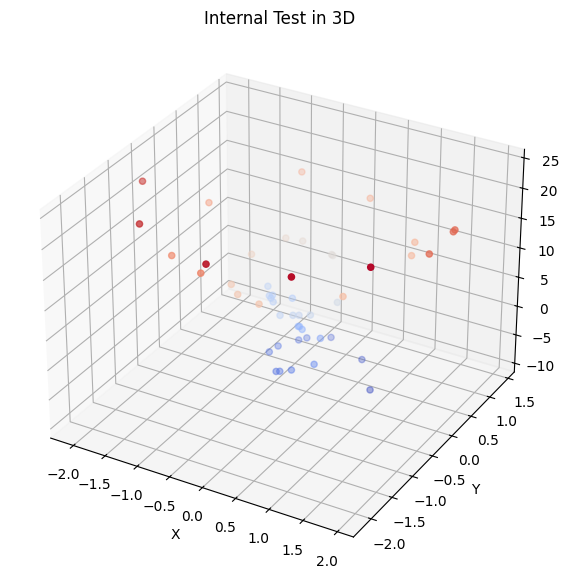

In [28]:
# Plot delle predizioni in 3D (internal test)

X = y_pred_test[:, 0]  
Y = y_pred_test[:, 1]  
Z = y_pred_test[:, 2]  

# Creazione figure 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D
ax.scatter(X, Y, Z, c=Z, cmap='coolwarm', marker='o')

# Label assi
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Internal Test in 3D")

plt.show()

In [29]:
y_blind_test_pred= best_mlp.predict(X_blind_test)
print(y_blind_test_pred.shape)

(500, 3)


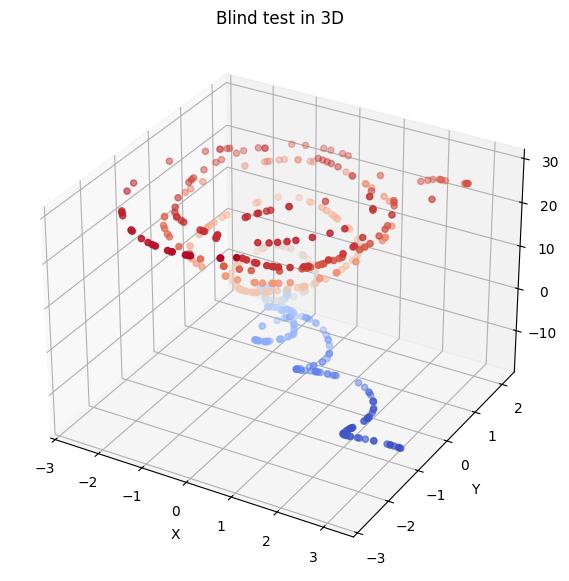

In [30]:
# Plot delle predizioni in 3D (blind test)

X = y_blind_test_pred[:, 0]  
Y = y_blind_test_pred[:, 1]  
Z = y_blind_test_pred[:, 2] 

# Creazione figura 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D
ax.scatter(X, Y, Z, c=Z, cmap='coolwarm', marker='o')

# Label assi
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Blind test in 3D")

plt.show()

### Model Selection

In [35]:
# # Estrazione dei migliori iperparametri trovati
# best_params = grid_search.best_params_
# best_params

best_params = {'activation': 'relu',
 'alpha': 0.1,
 'batch_size': 32,
 'hidden_layer_sizes': (50, 50),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.002,
 'momentum': 0.95,
 'solver': 'sgd'}

Training con random_state=7...
Early stopping at epoch 104


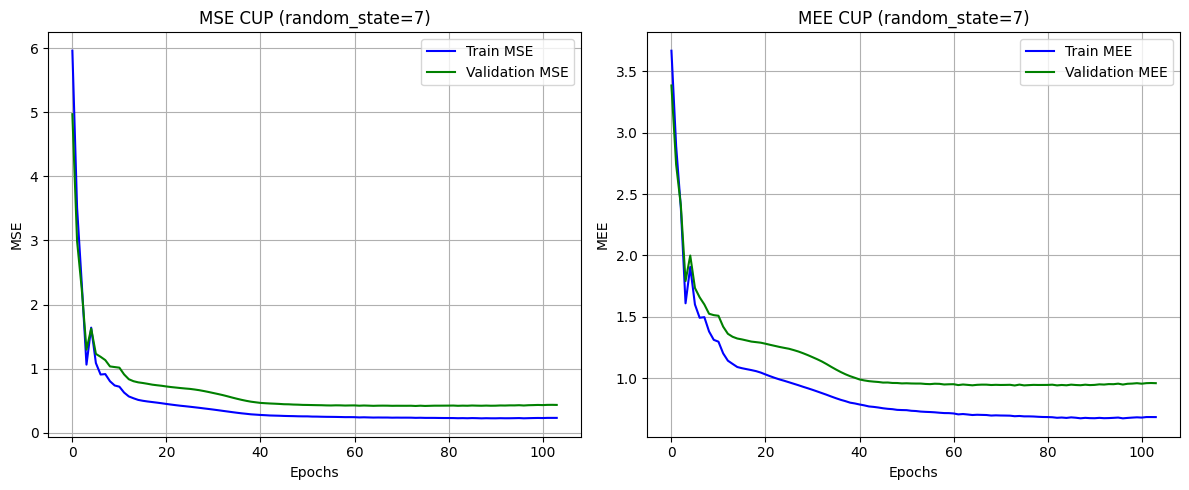

Risultati per random_state=7:
  - Train MSE: 0.23361, Validation MSE: 0.43574
  - Train MEE: 0.68402, Validation MEE: 0.96018
--------------------------------------------------
Training con random_state=13...
Early stopping at epoch 91


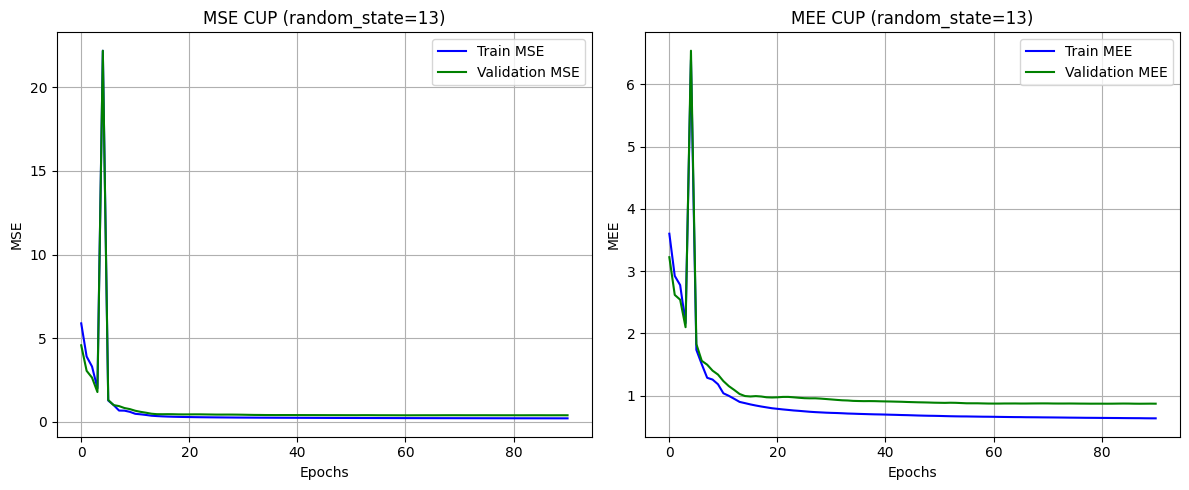

Risultati per random_state=13:
  - Train MSE: 0.20210, Validation MSE: 0.38598
  - Train MEE: 0.63620, Validation MEE: 0.87164
--------------------------------------------------
Training con random_state=26...
Early stopping at epoch 104


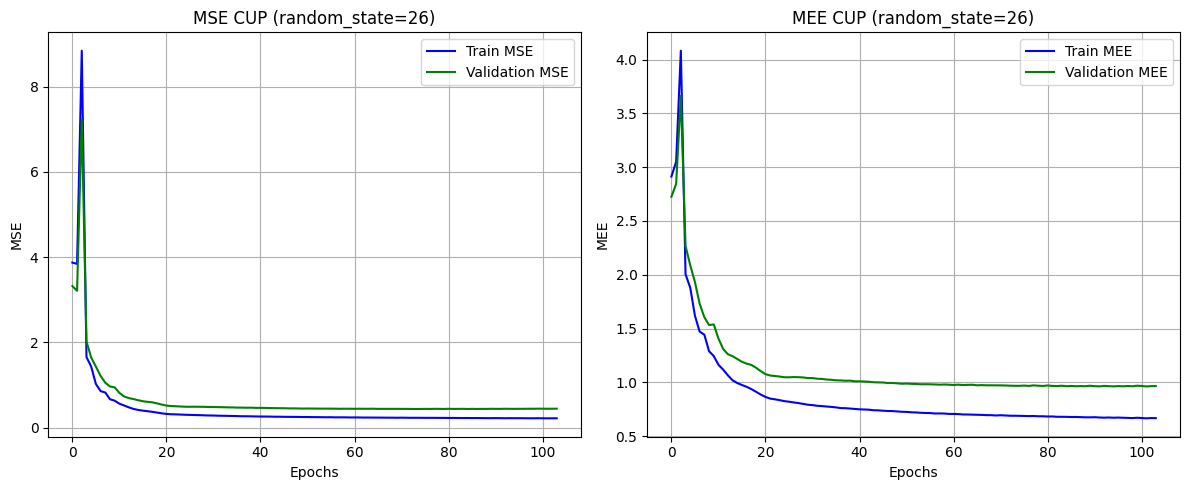

Risultati per random_state=26:
  - Train MSE: 0.22209, Validation MSE: 0.44759
  - Train MEE: 0.66694, Validation MEE: 0.96512
--------------------------------------------------
Training con random_state=39...
Early stopping at epoch 112


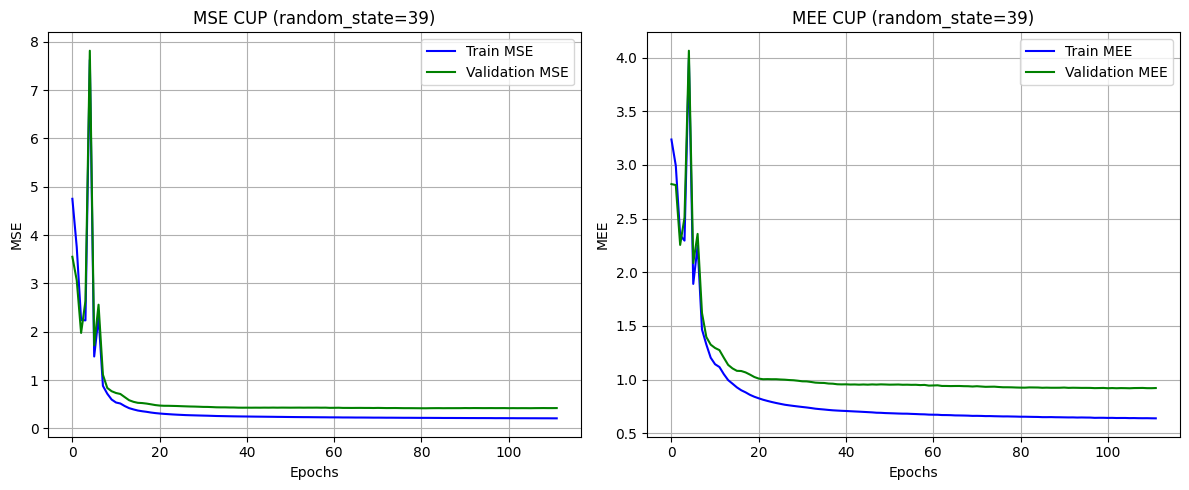

Risultati per random_state=39:
  - Train MSE: 0.20969, Validation MSE: 0.42217
  - Train MEE: 0.63940, Validation MEE: 0.92169
--------------------------------------------------
Training con random_state=47...
Early stopping at epoch 171


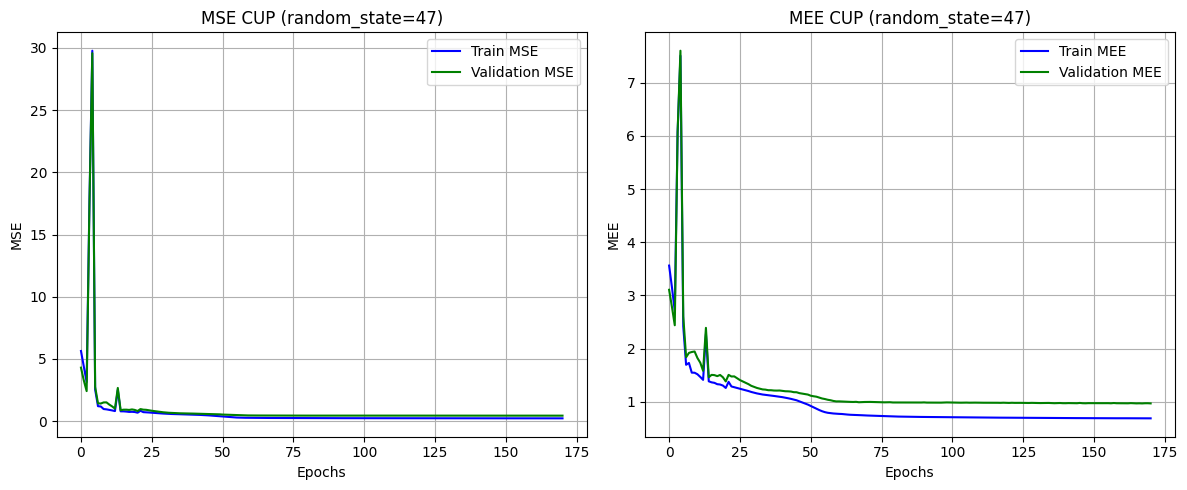

Risultati per random_state=47:
  - Train MSE: 0.22922, Validation MSE: 0.44476
  - Train MEE: 0.69004, Validation MEE: 0.97084
--------------------------------------------------


In [38]:
# 5 run diverse corrispondenti a 5 random_state differenti (MODEL SELECTION)

epochs = 500

# Seed differenti
random_states = [7, 13, 26, 39, 47]

for rs in random_states:
    print(f"Training con random_state={rs}...")

    # Inizializzazione modello con i miglior iperparametri trovati
    nn = MLPRegressor(
        hidden_layer_sizes=best_params['hidden_layer_sizes'],
        activation=best_params['activation'],
        solver='sgd',
        alpha=best_params['alpha'],
        learning_rate_init=best_params['learning_rate_init'],
        learning_rate=best_params['learning_rate'],
        momentum=best_params['momentum'],
        batch_size=32,  # minibatch (32)
        max_iter=1, # nota bene
        warm_start=True, # nota bene
        shuffle=True,
        random_state=rs,
        verbose=False
      )

    train_mse_list = []
    val_mse_list = []
    train_mee_list = []
    val_mee_list = []

    patience = 30  # Numero di epoche senza miglioramenti prima di fermarsi
    best_val_loss = float('inf')
    counter = 0  

    for epoch in range(epochs):  
        nn.partial_fit(X_train, y_train)
        
        # Predizioni su training e test set
        y_train_pred = nn.predict(X_train)
        y_val_pred = nn.predict(X_val)  

        # Calcolo metriche     
        train_mse = mean_squared_error(y_train, y_train_pred)
        val_mse = mean_squared_error(y_val, y_val_pred)

        train_mee = mean_euclidean_error(y_train, y_train_pred)
        val_mee = mean_euclidean_error(y_val, y_val_pred)

        # Memorizziamo i valori di loss e accuracy
        train_mse_list.append(train_mse)    
        val_mse_list.append(val_mse)
        train_mee_list.append(train_mee)
        val_mee_list.append(val_mee)

        if val_mse < best_val_loss:
            best_val_loss = val_mse
            counter = 0
        else:
            counter += 1

        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    # Creazione della figura con due subplot
    fig, ax1 = plt.subplots(1, 2, figsize=(12, 5))

    # Plot MSE
    ax1[0].plot(train_mse_list, label="Train MSE", color="blue")
    ax1[0].plot(val_mse_list, label="Validation MSE", color="green")
    ax1[0].set_xlabel("Epochs")
    ax1[0].set_ylabel("MSE")
    ax1[0].set_title(f"MSE CUP (random_state={rs})")
    ax1[0].legend()
    ax1[0].grid(True)

    # Plot Accuracy
    ax1[1].plot(train_mee_list, label="Train MEE", color="blue")
    ax1[1].plot(val_mee_list, label="Validation MEE", color="green")
    ax1[1].set_xlabel("Epochs")
    ax1[1].set_ylabel("MEE")
    ax1[1].set_title(f"MEE CUP (random_state={rs})")
    ax1[1].legend()
    ax1[1].grid(True)

    # Mostra la figura completa con i due subplot
    plt.tight_layout()
    plt.show()

    # Stampa dei risultati finali per ogni seed
    print(f"Risultati per random_state={rs}:")
    print(f"  - Train MSE: {train_mse_list[-1]:.5f}, Validation MSE: {val_mse_list[-1]:.5f}")
    print(f"  - Train MEE: {train_mee_list[-1]:.5f}, Validation MEE: {val_mee_list[-1]:.5f}")
    print("-" * 50)

### Re-Training Best Model

In [39]:
# # Estrazione dei migliori iperparametri trovati
# best_params = grid_search.best_params_
# best_params

best_params = {'activation': 'relu',
 'alpha': 0.1,
 'batch_size': 32,
 'hidden_layer_sizes': (50, 50),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.002,
 'momentum': 0.95,
 'solver': 'sgd'}

In [40]:
# Creazione del miglior modello con gli iperparametri trovati
best_mlp = MLPRegressor(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    solver='sgd',
    alpha=best_params['alpha'],
    learning_rate_init=best_params['learning_rate_init'],
    learning_rate=best_params['learning_rate'],
    momentum=best_params['momentum'],
    batch_size=32,  # minibatch (32)
    max_iter=1,  # nota bene
    warm_start=True, # nota bene
    shuffle=True,
    random_state=13,
    verbose=False,
)

In [ ]:
epochs = 500

dev_mse_list = []
test_mse_list = []
dev_mee_list = []
test_mee_list = [] 

for epoch in range(epochs):  
    best_mlp.partial_fit(X_dev, y_dev)
        
    # Predizioni su training e test set
    y_dev_pred = best_mlp.predict(X_dev)
    y_test_pred = best_mlp.predict(X_test)  

    # Calcolo metriche     
    dev_mse = mean_squared_error(y_dev, y_dev_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    dev_mee = mean_euclidean_error(y_dev, y_dev_pred)
    test_mee = mean_euclidean_error(y_test, y_test_pred)

    # Memorizziamo i valori di loss e accuracy
    dev_mse_list.append(dev_mse)    
    test_mse_list.append(test_mse)
    dev_mee_list.append(dev_mee)
    test_mee_list.append(test_mee)

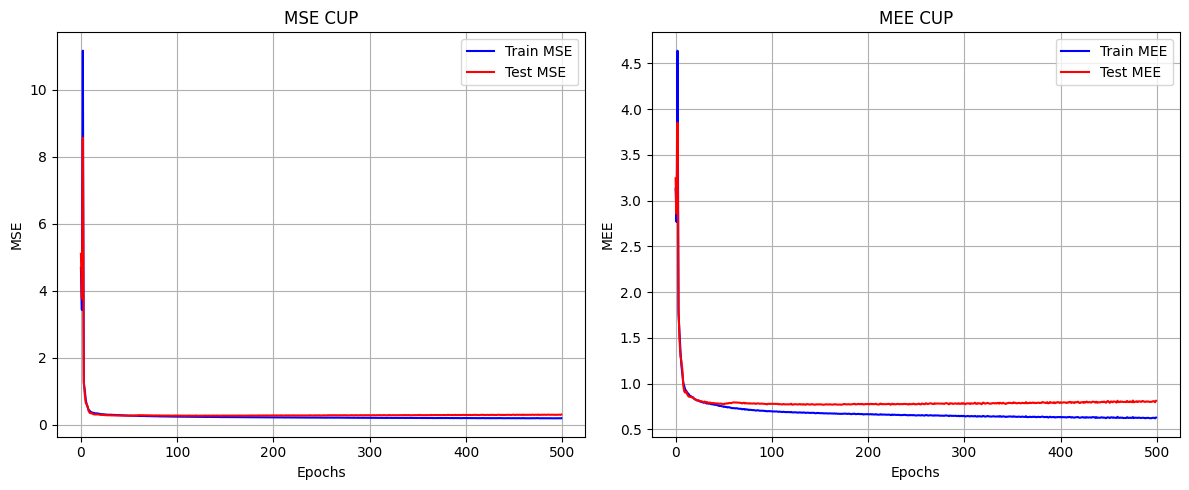

  - Train MSE: 0.19793, Test MSE: 0.30627
  - Train MEE: 0.62777, Test MEE: 0.81071
--------------------------------------------------


In [42]:
# Creazione della figura con due subplot
fig, ax1 = plt.subplots(1, 2, figsize=(12, 5))

# Plot MSE
ax1[0].plot(dev_mse_list, label="Train MSE", color="blue")
ax1[0].plot(test_mse_list, label="Test MSE", color="red")
ax1[0].set_xlabel("Epochs")
ax1[0].set_ylabel("MSE")
ax1[0].set_title(f"MSE CUP")
ax1[0].legend()
ax1[0].grid(True)

# Plot MEE
ax1[1].plot(dev_mee_list, label="Train MEE", color="blue")
ax1[1].plot(test_mee_list, label="Test MEE", color="red")
ax1[1].set_xlabel("Epochs")
ax1[1].set_ylabel("MEE")
ax1[1].set_title(f"MEE CUP")
ax1[1].legend()
ax1[1].grid(True)

# Figura completa con i due subplot
plt.tight_layout()
plt.show()

print(f"  - Train MSE: {dev_mse_list[-1]:.5f}, Test MSE: {test_mse_list[-1]:.5f}")
print(f"  - Train MEE: {dev_mee_list[-1]:.5f}, Test MEE: {test_mee_list[-1]:.5f}")
print("-" * 50)

In [28]:
# Valutazione sull'internal Test Set
y_pred_test = best_mlp.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred_test)
test_mee = mean_euclidean_error(y_test, y_pred_test)

print(f"MSE Internal Test: {test_mse}")
print(f"MEE Internal Test: {test_mee}")

MSE Internal Test: 0.3062681191580226
MEE Internal Test: 0.8107065261665011


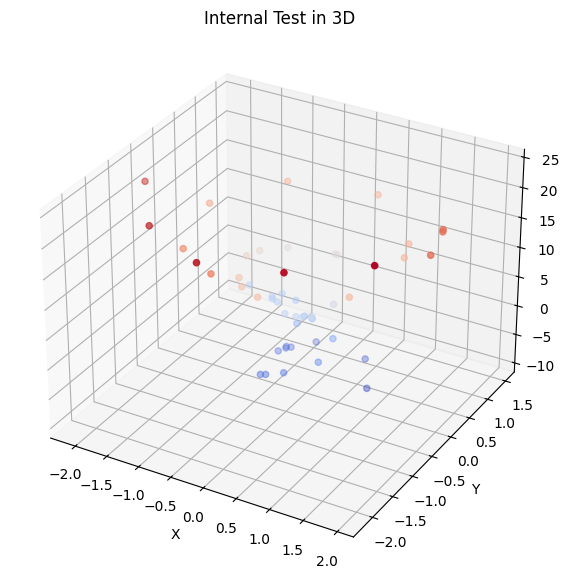

In [29]:
# Plot delle predizioni in 3D (internal test)

X = y_pred_test[:, 0]  
Y = y_pred_test[:, 1]  
Z = y_pred_test[:, 2] 

# Creazione figura 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D
ax.scatter(X, Y, Z, c=Z, cmap='coolwarm', marker='o')

# Label assi
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Internal Test in 3D")

plt.show()

In [30]:
y_blind_test_pred= best_mlp.predict(X_blind_test)

In [31]:
print(y_blind_test_pred.shape)

(500, 3)


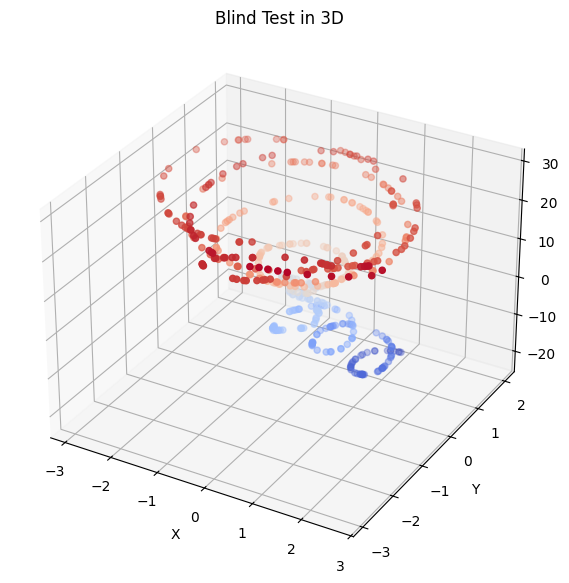

In [32]:
# Plot delle predizioni in 3D (blind test)

X = y_blind_test_pred[:, 0]  
Y = y_blind_test_pred[:, 1]  
Z = y_blind_test_pred[:, 2] 

# Creazione figura 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D
ax.scatter(X, Y, Z, c=Z, cmap='coolwarm', marker='o')

# Label assi
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Blind Test in 3D")

plt.show()